# [Week7] 이미지 분석 활용 맛보기

* 과제
    * 문제 1번을 풀어주세요.
    * `2~3번`의 각 실행 코드를 실행해보며, 자신이 이해하기 편하도록 코드를 분석하여 `주석`을 달아주세요.
    * `4번`의 맨 마지막 실습은 `직접 코드를 작성`해주세요.

## 1. 라이브러리 설치

### (1) cvlib : 객체인식, 얼굴인식, 성별인식

* 참고 링크 : [cvlib docs](https://docs.cvlib.net/)
* 혹시 아래 라이브러리를 설치하다가 버전 문제가 생길 때(특히 tensorflow), 해결하기 가장 쉬운 방법은 다음과 같습니다.
    * 주피터 노트북에서 새로운 가상환경을 만들기
    * 모든 라이브러리를 최신 버전으로 다시 다운 받기 (numpy 버전과 tensorflow 버전을 호환되게 맞추기)

In [2]:
# CVlib
!pip install cvlib

In [3]:
# tensorflow
!pip install tensorflow

In [2]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import numpy as np

> __문제 1번 : cvlib 이용 시 매개변수로 넣는 이미지의 기본 컬러공간(color space)은 무엇이어야 할까요?__

* 답변 : b,g,r

## 2. 라이브러리 사용 실습

* 참고 링크 : https://github.com/arunponnusamy/cvlib

### 2-1. 객체인식(Object Detection)

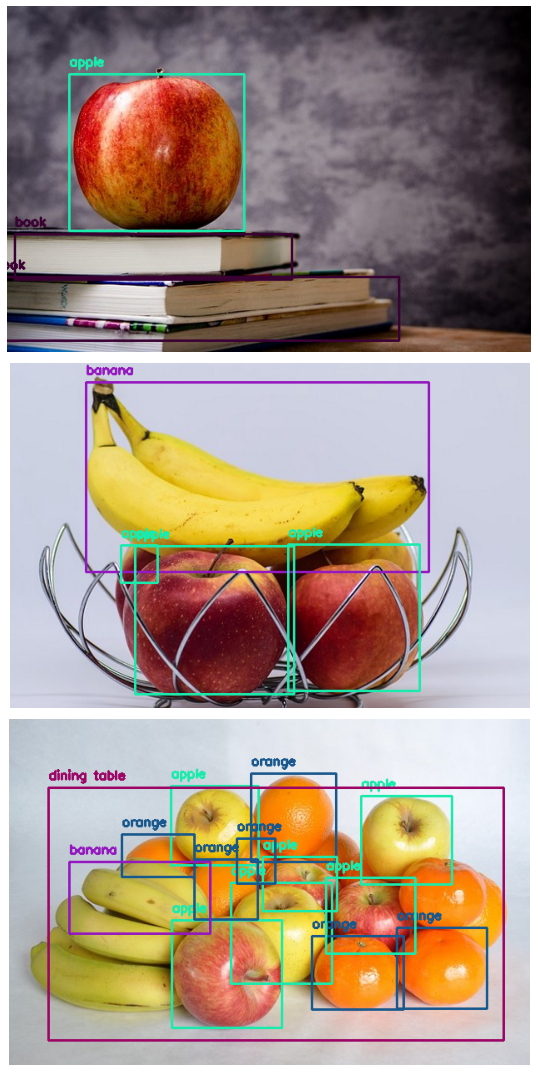

In [5]:
#15inch x 15inch figure
fig = plt.figure(figsize=(15,15)) 
for i in range(1, 4):
    # image_path에서 이미지를 읽어오고
    image_path = './image/image'+ str(i) +'.jpeg'
    im = cv2.imread(image_path)
    
    # object detection 수행
    # bbox : detect한 부분, label : 물체를 detect한 라벨, conf : label로 분류된 확률
    bbox, label, conf = cv.detect_common_objects(im)
    
    # 결과 이미지에 detect한 부분을 네모로 표시하고 라벨 붙이기
    output_image = draw_bbox(im, bbox, label, conf)
    # BGR -> RGB
    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    
    # figure를 3x1 그리드 나누고 i번째 좌표계에 이미지 표시하기
    plt.subplot(3, 1, i)
    plt.imshow(output_image)
    # 좌표축 삭제
    plt.axis('off')
    
# padding 등 subplot layout 자동 조정
plt.tight_layout()
plt.show()

### 2-2. 얼굴인식(Face Detection)

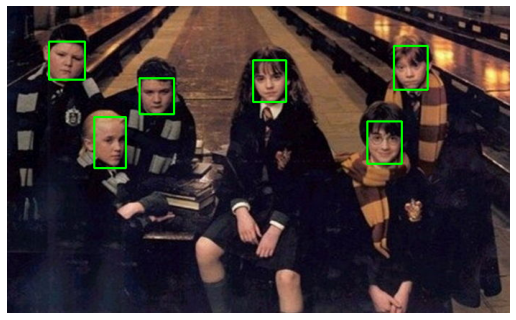

In [6]:
# 9inch x 9inc figure 생성
fig = plt.figure(figsize=(9,9))

# 이미지 가져와서 openCV로 읽기
image_path = './image/harrypotter.jpg'
im = cv2.imread(image_path)

# face detection 결과 저장 (faces: detect한 얼굴 부분 좌표, confidences: 확률)
faces, confidences = cv.detect_face(im)

# face로 detect된 faces에서 얼굴 하나씩 좌표 저장
for face in faces:
    # detect한 얼굴 표시하기 위해 사진 위에 얼굴 부분 사각형 그리기 (green으로 두께는 2)
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)

# color space bgr -> rgb 변경
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im)
plt.axis('off')
plt.show()

### 2-3. 성별인식(Gender Detection)

[INFO] Initializing gender detection model ..


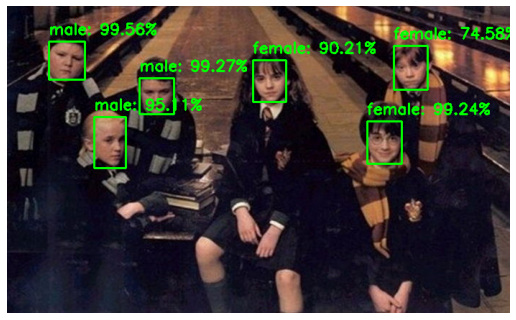

In [7]:
fig = plt.figure(figsize=(9,9))
image_path = './image/harrypotter.jpg'
im = cv2.imread(image_path)

faces, confidences = cv.detect_face(im)

# 얼굴들 좌표 저장
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    
    # 좌표 이용해서 각 얼굴들만 잘라서 face_crop에 저장
    face_crop = np.copy(im[startY:endY, startX:endX])
    
    # label: 성별, confidence: 확률
    (label, confidence) = cv.detect_gender(face_crop)

    # 가장 큰 confidence값 idx에 저장
    idx = np.argmax(confidence)
    # 해당 idx에 해당하는 라벨을 대표 라벨로 설정
    label = label[idx]
    # label : 확률 형식으로 라벨 저장하기 ex) 여성: 98.76%
    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    # 만약 startY-10의 값이 0보다 크다면 수행하고 작다면 10 더하기
    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # green rectangle로 나타내고 라벨도 같이 보여주기
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)
    cv2.putText(im, label, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0,255,0), 2)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.show()

## 3. 웹캠 입출력

In [8]:
webcam = cv2.VideoCapture(0)

# webcam이 안 열리면 오류 출력하고 종료
if not webcam.isOpened():
    print("Could not open webcam")
    exit()

# webcam 열려있는 동안
while webcam.isOpened():
    # 찍어서 status(잘 작동하는지 true/false boolean값), frame(찍은 화면) 저장
    status, frame = webcam.read()

    # false 값 반환되면 오류 출력 후 종료
    if not status:
        print("Could not read frame")
        exit()
    
    # 좌우 반전하여 저장
    frame = cv2.flip(frame, 1)
    # Real-time video라는 창 안에 frame(찍은 화면) 출력
    cv2.imshow("Real-time video", frame)
    
    # q 누르면 종료
    # cv2.waitKey(1) : key 누르면 아스키코드 반환, 안 누르면 -1 반환
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()

## 4. 나만의 프로그램 만들기 (직접 코드 작성)

* 실습 내용 : `웹캠 입출력`과 `객체인식 or 얼굴인식+성별인식` 코드를 합친 코드를 작성하세요.
    * 후보1 : 웹캠 입출력 + 객체인식 프로그램
    * 후보2 : 웹캠 입출력 + 얼굴인식+성별인식 프로그램

* 나의 선택 : 후보 ( 2 ) 번

In [4]:
# 직접 코드 작성

webcam = cv2.VideoCapture(0)

# webcam이 안 열리면 오류 출력하고 종료
if not webcam.isOpened():
    print("Could not open webcam")
    exit()

# webcam 열려있는 동안
while webcam.isOpened():
    # 찍어서 status(잘 작동하는지 true/false boolean값), frame(찍은 화면) 저장
    status, frame = webcam.read()

    # false 값 반환되면 오류 출력 후 종료
    if not status:
        print("Could not read frame")
        exit()
    
    # 좌우 반전하여 저장
    frame = cv2.flip(frame, 1)
    # Real-time video라는 창 안에 frame(찍은 화면) 출력
    faces, confidences = cv.detect_face(frame)
        # 얼굴들 좌표 저장
    for face in faces:
        (startX,startY) = face[0],face[1]
        (endX,endY) = face[2],face[3]
    
        # 좌표 이용해서 각 얼굴들만 잘라서 face_crop에 저장
        face_crop = np.copy(frame[startY:endY, startX:endX])
    
        # label: 성별, confidence: 확률
        (label, confidence) = cv.detect_gender(face_crop)

        # 가장 큰 confidence값 idx에 저장
        idx = np.argmax(confidence)
        # 해당 idx에 해당하는 라벨을 대표 라벨로 설정
        label = label[idx]
        # label : 확률 형식으로 라벨 저장하기 ex) 여성: 98.76%
        label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

        # 만약 startY-10의 값이 0보다 크다면 수행하고 작다면 10 더하기
        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # green rectangle로 나타내고 라벨도 같이 보여주기
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)
        cv2.putText(frame, label, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0,255,0), 2)
        cv2.imshow("Real-time video", frame)
    
    # q 누르면 종료
    # cv2.waitKey(1) : key 누르면 아스키코드 반환, 안 누르면 -1 반환
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()
